In [1]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
maindf = pd.read_csv("../data/ADA-USD.csv")

In [3]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  366
Total number of fields present in the dataset:  7


In [4]:
maindf.shape

(366, 7)

In [5]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-27,0.489558,0.507615,0.478620,0.485790,0.485790,709992597.0
1,2022-06-28,0.485571,0.496544,0.468228,0.469671,0.469671,724759074.0
2,2022-06-29,0.469673,0.475916,0.460463,0.465509,0.465509,769352065.0
3,2022-06-30,0.465602,0.466736,0.436185,0.458849,0.458849,903962268.0
4,2022-07-01,0.459312,0.470312,0.444410,0.448089,0.448089,796619668.0


In [6]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-06-23,0.290343,0.302238,0.288063,0.296482,0.296482,245002154.0
362,2023-06-24,0.296485,0.297266,0.285937,0.290012,0.290012,208155226.0
363,2023-06-25,0.290002,0.303087,0.289118,0.292325,0.292325,225729335.0
364,2023-06-26,NaN,NaN,NaN,NaN,NaN,NaN
365,2023-06-27,0.280164,0.284050,0.279531,0.283270,0.283270,204192240.0


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [8]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.386123,0.395464,0.376260,0.385574,0.385574,4.673922e+08
std,0.072302,0.074998,0.070337,0.072282,0.072282,2.942325e+08
min,0.244126,0.245987,0.230420,0.244140,0.244140,9.066601e+07
25%,0.336490,0.346740,0.326745,0.332595,0.332595,2.382884e+08
50%,0.381323,0.389506,0.372232,0.380119,0.380119,3.911605e+08
75%,0.440876,0.450795,0.429621,0.438330,0.438330,6.182367e+08
max,0.570386,0.593898,0.557554,0.570343,0.570343,1.601170e+09


In [9]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 6


In [10]:
print('NA values:',maindf.isnull().values.any())

NA values: True


In [11]:
# If dataset had null values we can use this code to drop all the null values present in the dataset
maindf=maindf.dropna()
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [12]:
maindf.shape

(365, 7)

In [13]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

In [14]:
closedf = maindf[['Date','Close']]
close_stock = closedf.copy()
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (365, 2)


In [15]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2022-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [16]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
print(closedf)

(365, 1)
[[0.74079638]
 [0.69138236]
 [0.67862343]
 [0.6582067 ]
 [0.6252211 ]
 [0.65054889]
 [0.64820679]
 [0.69129959]
 [0.65447589]
 [0.66841507]
 [0.71633921]
 [0.6841476 ]
 [0.71924538]
 [0.67160633]
 [0.58668988]
 [0.53276028]
 [0.59462359]
 [0.60356588]
 [0.60795272]
 [0.65324353]
 [0.62296484]
 [0.76149821]
 [0.8326962 ]
 [0.75689984]
 [0.78465863]
 [0.73514345]
 [0.83760113]
 [0.82670607]
 [0.71155078]
 [0.68505501]
 [0.81670923]
 [0.8252162 ]
 [0.85589342]
 [0.86276337]
 [0.83653431]
 [0.82765333]
 [0.77464953]
 [0.787387  ]
 [0.78334044]
 [0.83801498]
 [0.81886433]
 [0.86856957]
 [0.89654602]
 [0.82743568]
 [0.89806961]
 [0.88018197]
 [0.90928961]
 [0.96771949]
 [1.        ]
 [0.94122678]
 [0.96190102]
 [0.897901  ]
 [0.82308562]
 [0.63408368]
 [0.63533444]
 [0.67260571]
 [0.666168  ]
 [0.67769763]
 [0.65593817]
 [0.67705999]
 [0.5724135 ]
 [0.63016894]
 [0.56991812]
 [0.63323452]
 [0.63772865]
 [0.62085572]
 [0.65401299]
 [0.64505538]
 [0.72423307]
 [0.79381244]
 [0.7816635

In [17]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


In [18]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (239, 15, 1)
X_test:  (94, 15, 1)


In [21]:
model=Sequential()

model.add(LSTM(20,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [22]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
8/8 [==============================] - 2s 46ms/step - loss: 0.2579 - val_loss: 0.1207
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 0.1911 - val_loss: 0.0841
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1385 - val_loss: 0.0561
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0947 - val_loss: 0.0329
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0553 - val_loss: 0.0151
Epoch 6/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0236 - val_loss: 0.0067
Epoch 7/200
8/8 [==============================] - 0s 12ms/step - loss: 0.0090 - val_loss: 0.0069
Epoch 8/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 9/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0043
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0042
Epoch 11/200
8/8 [=====

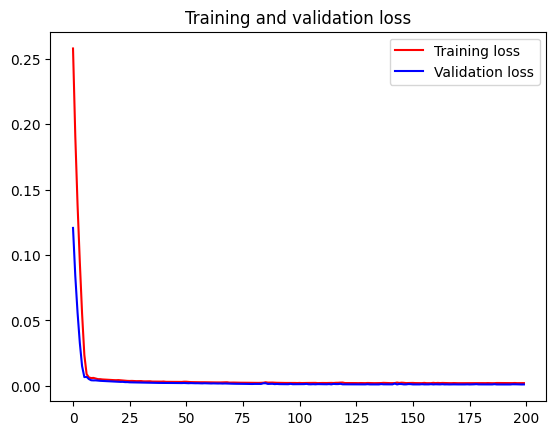

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 2ms/step


((239, 1), (94, 1))

In [25]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [26]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.014997455750201158
Train data MSE:  0.00022492367897924176
Train data MAE:  0.010726564863228902
-------------------------------------------------------------------------------------
Test data RMSE:  0.010878956638638377
Test data MSE:  0.00011835169754537401
Test data MAE:  0.008469257034829319


In [27]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9651459944900892
Test data explained variance regression score: 0.9477487088088551


In [28]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [29]:
model.save("../models/ada_usd_model.h5")